Key Points:

* There are two types of request => get request and post request
* There are two types of data in datasets => json(javascript object notation) and dictionary
* For scatter plot => Both varaibles data should be numeric. If data is avaible in string format convert into numeric data.
* Scatter plot used to tell corelation between data
* For categorical data we don't use scatter graph
* For absolute value - Go for bar chart
* For percentage or proportional value - Go for pie chart =>They both are used for categorical data

According to UCI Machine Learning Repository - Bike Sharing DataSet

Information:
* Data is Integer, Real
* dteday : date
* season : season (1:winter, 2:spring, 3:summer, 4:fall)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* weathersit : 
    - 1: Clear
    - 2: Mist
    - 3: Light Snow
    - 4: Heavy Rain
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered 

---

In [2]:
url = "https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip" #import url

Import data response

In [5]:
import requests  #import data response
response = requests.get(url)
response

<Response [200]>

In [4]:
#dir(response)   #to know all the methods and attributes of response

Open file using with (context manager)

In [6]:
with open("bike.zip", "wb") as f:
    f.write(response.content) 

Convert data into zip file

In [7]:
import zipfile
with zipfile.ZipFile("bike.zip") as zipped:
    zipped.extractall("bikeshare")

Read data from day.csv file

In [8]:
import pandas as pd
path ="bikeshare\day.csv"
bike = pd.read_csv(path)
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


#### Extracting some information regarding data

In [9]:
bike.shape

(731, 16)

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Note: Above data tells that there is no null-set, and 4 float column, 11 integar columns and 1 object series

In [11]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
bike['dteday'] = pd.to_datetime(bike.dteday)  #converting date into datetime

### Plotting graph using matplotlib

#### Graph between Date and Total rental bikes

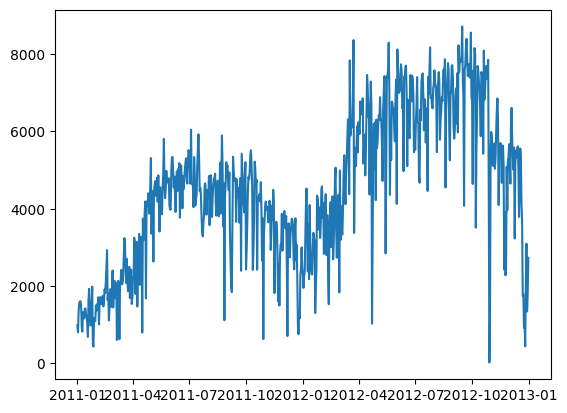

In [17]:
import matplotlib.pyplot as plt 
plt.plot(bike.dteday, bike.cnt)
plt.show()

# Note: The graph increases then decreases after certain interval of time.
# Then again increases and decreases, which shows that it repeats the same pattren. 
# So it is known as "seasonal trend" 

#### Comparision between Casual and Registered Users

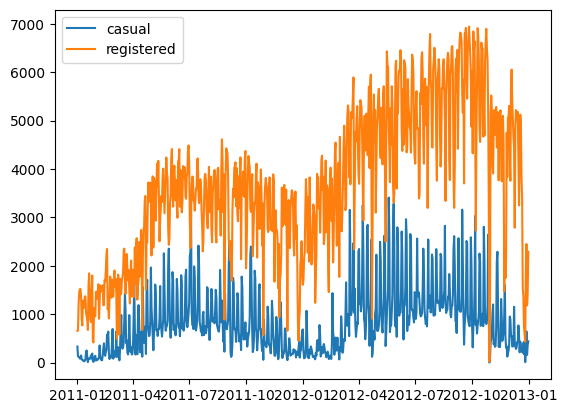

In [18]:
plt.plot(bike.dteday, bike.casual, label="casual")
plt.plot(bike.dteday, bike.registered, label="registered")
plt.legend()
plt.show()

#### Graph between Date and Temperature

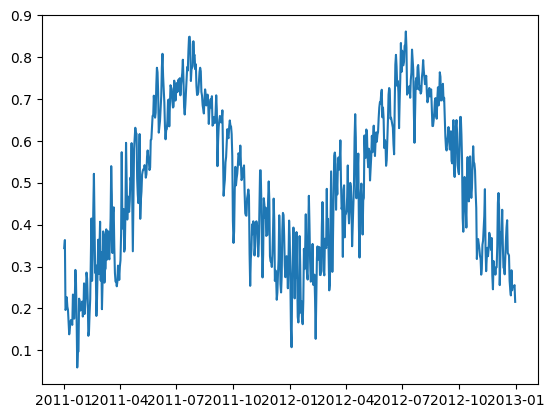

In [19]:
plt.plot(bike.dteday, bike.temp)
plt.show()

### Scatter Plot Using Matplotlib
It tells correlation between terms. There are three types of correlation => Positive correlation, Negative correlation
and no correaltion.\
In corealtion x and y axis doesnot matter. 

* Anything that is close to 1 => means it is 'strongly correlated'
* Anything that is less than 0.25 => means it should be observed critically.
---

* Specfic diection is used to show => positive or negative relation
* Specific degree / Certain degree is used to tell => whether it is 1 or 0

#### Graph between Temperature and Total Number of Users

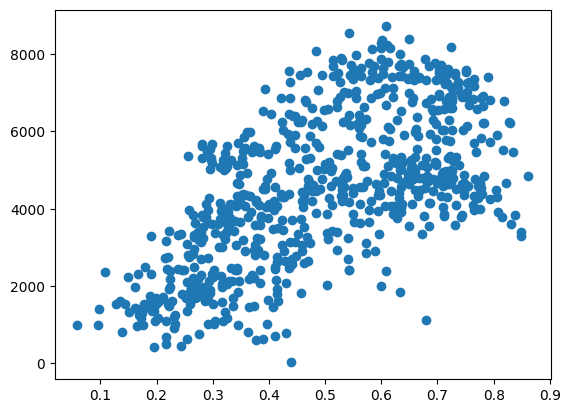

In [21]:
plt.scatter(bike.temp, bike.cnt)
plt.show()

#Note: Graph goes from left to right in upward position means it is "Positively Corraltion Graph"

### Corelation Plot for Series Using Matplotlib

#### Corealtion between Temperature and Total number of users

In [23]:
bike["temp"].corr(bike["cnt"])

# bike["cnt"].corr(bike["temp"])   #give same result as above (it doesnot matter what is written first)

0.6274940090334917

**Only Working data Correaltion**\
Agr series mention karein or yeh nahi bataye ke iska correaltion kiskey sath hai, tuo matplotlib sab columns ke sath 
correaltion dekha deyga

In [24]:
bike.corr().workingday

instant      -0.004337
dteday       -0.004337
season        0.012485
yr           -0.002013
mnth         -0.005901
holiday      -0.253023
weekday       0.035790
workingday    1.000000
weathersit    0.061200
temp          0.052660
atemp         0.052182
hum           0.024327
windspeed    -0.018796
casual       -0.518044
registered    0.303907
cnt           0.061156
Name: workingday, dtype: float64

In [26]:
correlation_df = bike.corr()  #shows corelation with overall data
correlation_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [30]:
# bike.corr().workingday  #both shows same result

correlation_df["workingday"]

instant      -0.004337
dteday       -0.004337
season        0.012485
yr           -0.002013
mnth         -0.005901
holiday      -0.253023
weekday       0.035790
workingday    1.000000
weathersit    0.061200
temp          0.052660
atemp         0.052182
hum           0.024327
windspeed    -0.018796
casual       -0.518044
registered    0.303907
cnt           0.061156
Name: workingday, dtype: float64

Below code shows corealtion of working days with casual and registered users only.

Note: As we can see that the realtion of casual user is negative with working days, while the result of registered users is positive with working days. It means that resgistered users are more as compared to casual users in working days.

Now, if we want to determine the exact cause that why it gives the result like that, we have to use 'rigoras expression', which tells that both are independent of each other.\
Example: Like ice is saling more in summers, plus A/C are also selling more, but they both are selling more due to third thing i.e. temperature, which means that they both doesnot depend or effct each other.

In [29]:
correlation_df["workingday"][["casual", "registered"]]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64